In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
#import required library

In [ ]:
#reading the dataset

df = pd.read_csv('HeartDiseaseTrain-Test.csv',index_col=False)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

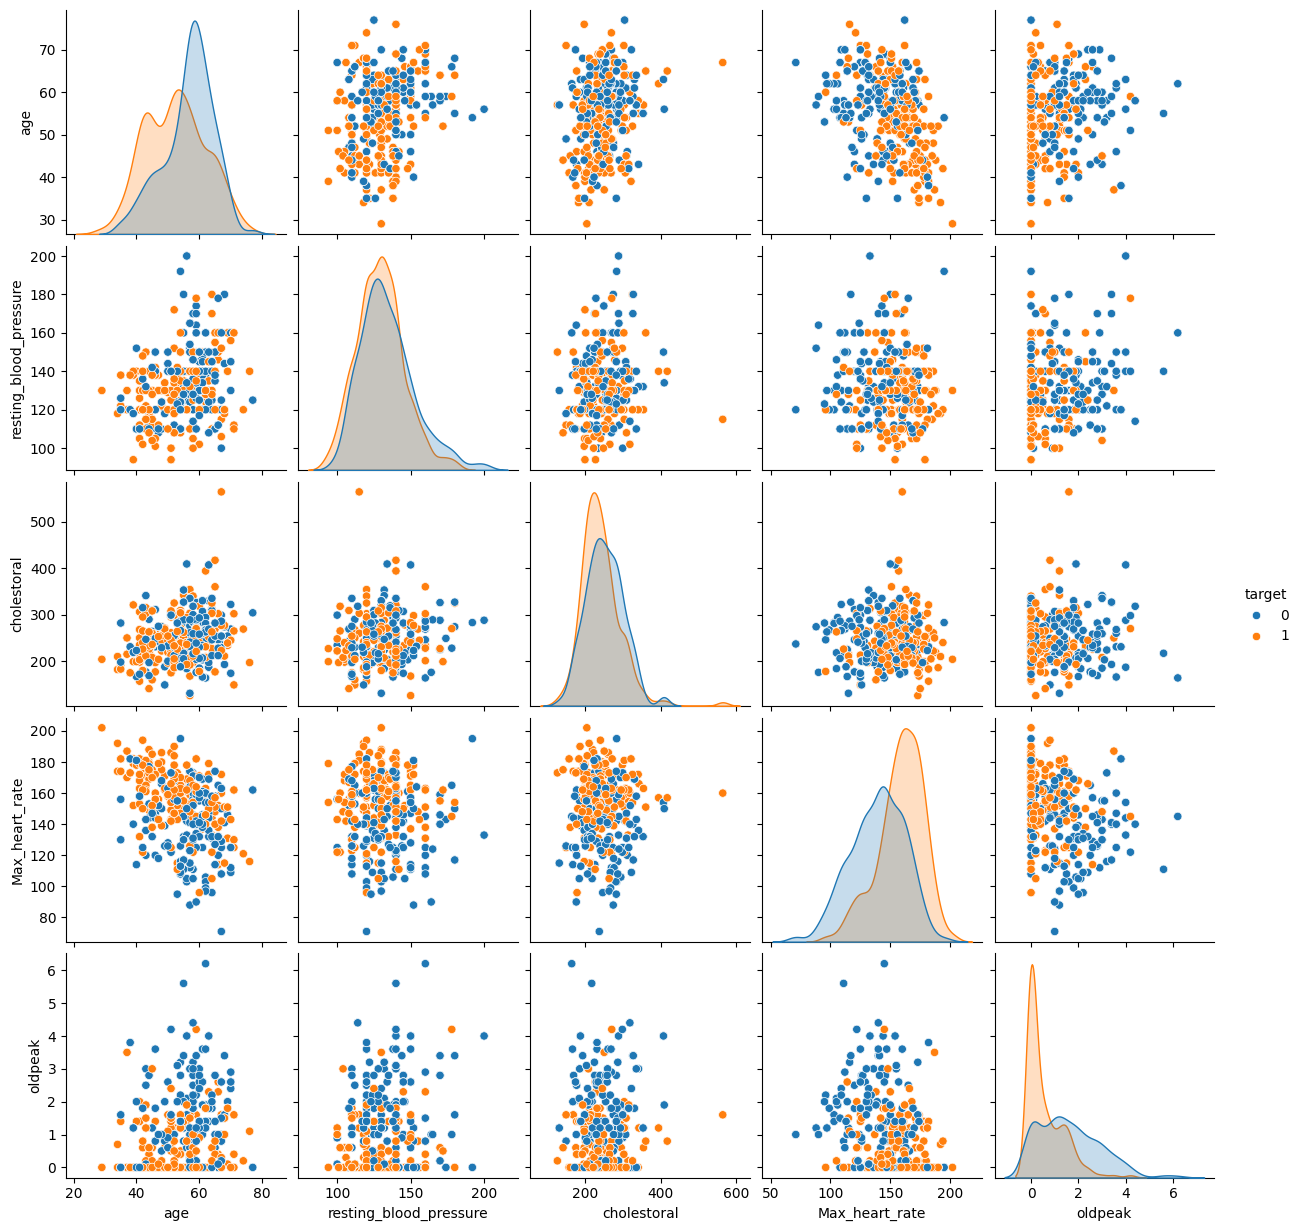

In [ ]:
##pairplot for the numerical variables
sns.pairplot(data=df,hue='target')
plt.show()

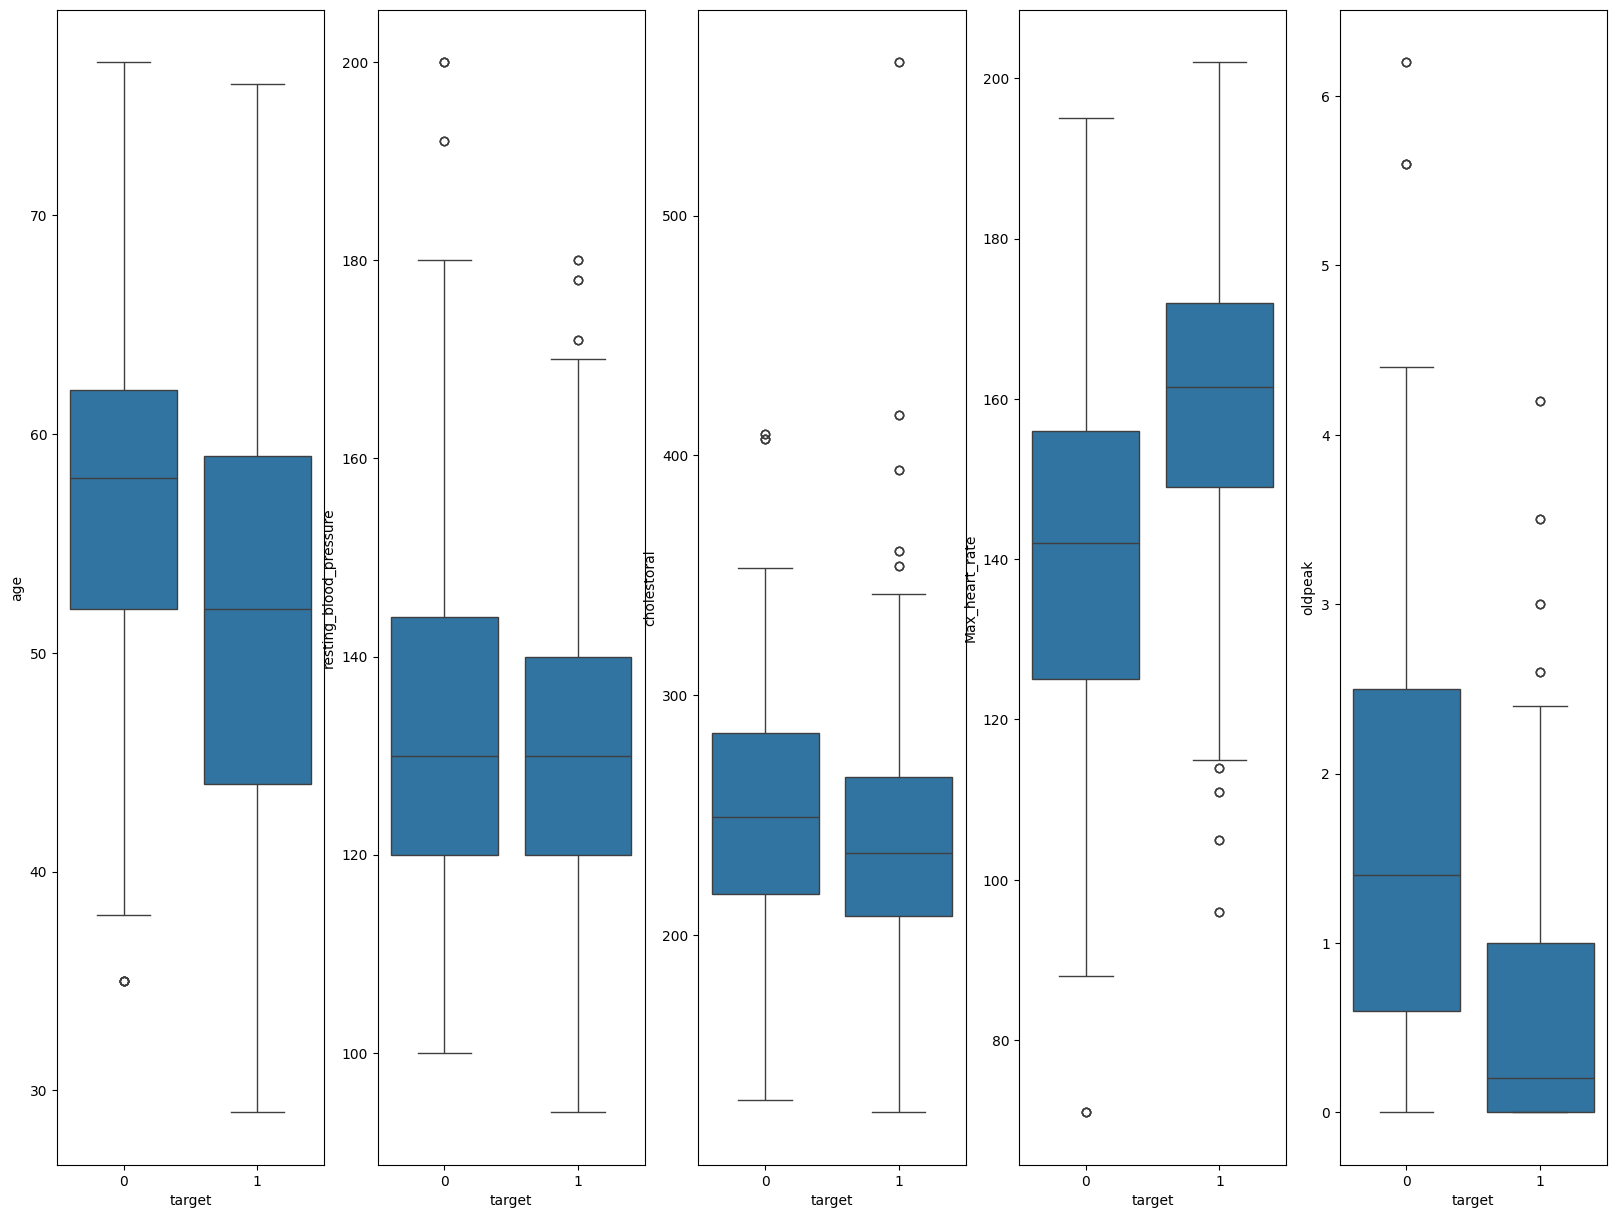

In [ ]:
num = ['age','resting_blood_pressure' ,'cholestoral','Max_heart_rate','oldpeak']

fig,ax=plt.subplots(1,5,figsize=(20,15))
ax=ax.ravel()

for index, col in enumerate(num):
    sns.boxplot(x='target',y=col,data=df, ax=ax[index])

## Numerical Values


### From Pairplot
- Seems that there are pretty obvious difference when it comes to heart rates and target -> *higher heart rate seems to have more heart attack*

- Seems for oldpeak, most heart disease that occur are concentrated around 0

- Other factors do not seem to provide much explanatory values

### From boxplots
- Older age median surprisingly results in less heart disease

- Low oldpeak seems to be more common with heart disease

- heart disease seems more common with higher max heart rate

- No significance difference when it comes to resting blood pressure and chloesteral

### Going forward

- Some insights maybe derived if we split blood pressure and chloesteral into high, medium, low according to some medical guidelines

## Categorical Values

- Looking at the paiplot itself, the numerical variables do not seem to explain much and nothing except oldpeak and max heart rate

- Let's have a look at categorical values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [ ]:
cat = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg', 'exercise_induced_angina','slope','vessels_colored_by_flourosopy','thalassemia']
df[cat]

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
0,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,Two,Reversable Defect
1,Male,Typical angina,Greater than 120 mg/ml,Normal,Yes,Upsloping,Zero,Reversable Defect
2,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,Yes,Upsloping,Zero,Reversable Defect
3,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,One,Reversable Defect
4,Female,Typical angina,Greater than 120 mg/ml,ST-T wave abnormality,No,Flat,Three,Fixed Defect
...,...,...,...,...,...,...,...,...
1020,Male,Atypical angina,Lower than 120 mg/ml,ST-T wave abnormality,Yes,Downsloping,Zero,Fixed Defect
1021,Male,Typical angina,Lower than 120 mg/ml,Normal,Yes,Flat,One,Reversable Defect
1022,Male,Typical angina,Lower than 120 mg/ml,Normal,Yes,Flat,One,Fixed Defect
1023,Female,Typical angina,Lower than 120 mg/ml,Normal,No,Downsloping,Zero,Fixed Defect


In [ ]:
for col in cat:
    print(f'For {col}, the unique values are: {df[col].unique()}')
    print('\n')

#to see each unique value in each categorical variable

For sex, the unique values are: ['Male' 'Female']


For chest_pain_type, the unique values are: ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']


For fasting_blood_sugar, the unique values are: ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']


For rest_ecg, the unique values are: ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']


For exercise_induced_angina, the unique values are: ['No' 'Yes']


For slope, the unique values are: ['Downsloping' 'Upsloping' 'Flat']


For vessels_colored_by_flourosopy, the unique values are: ['Two' 'Zero' 'One' 'Three' 'Four']


For thalassemia, the unique values are: ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']




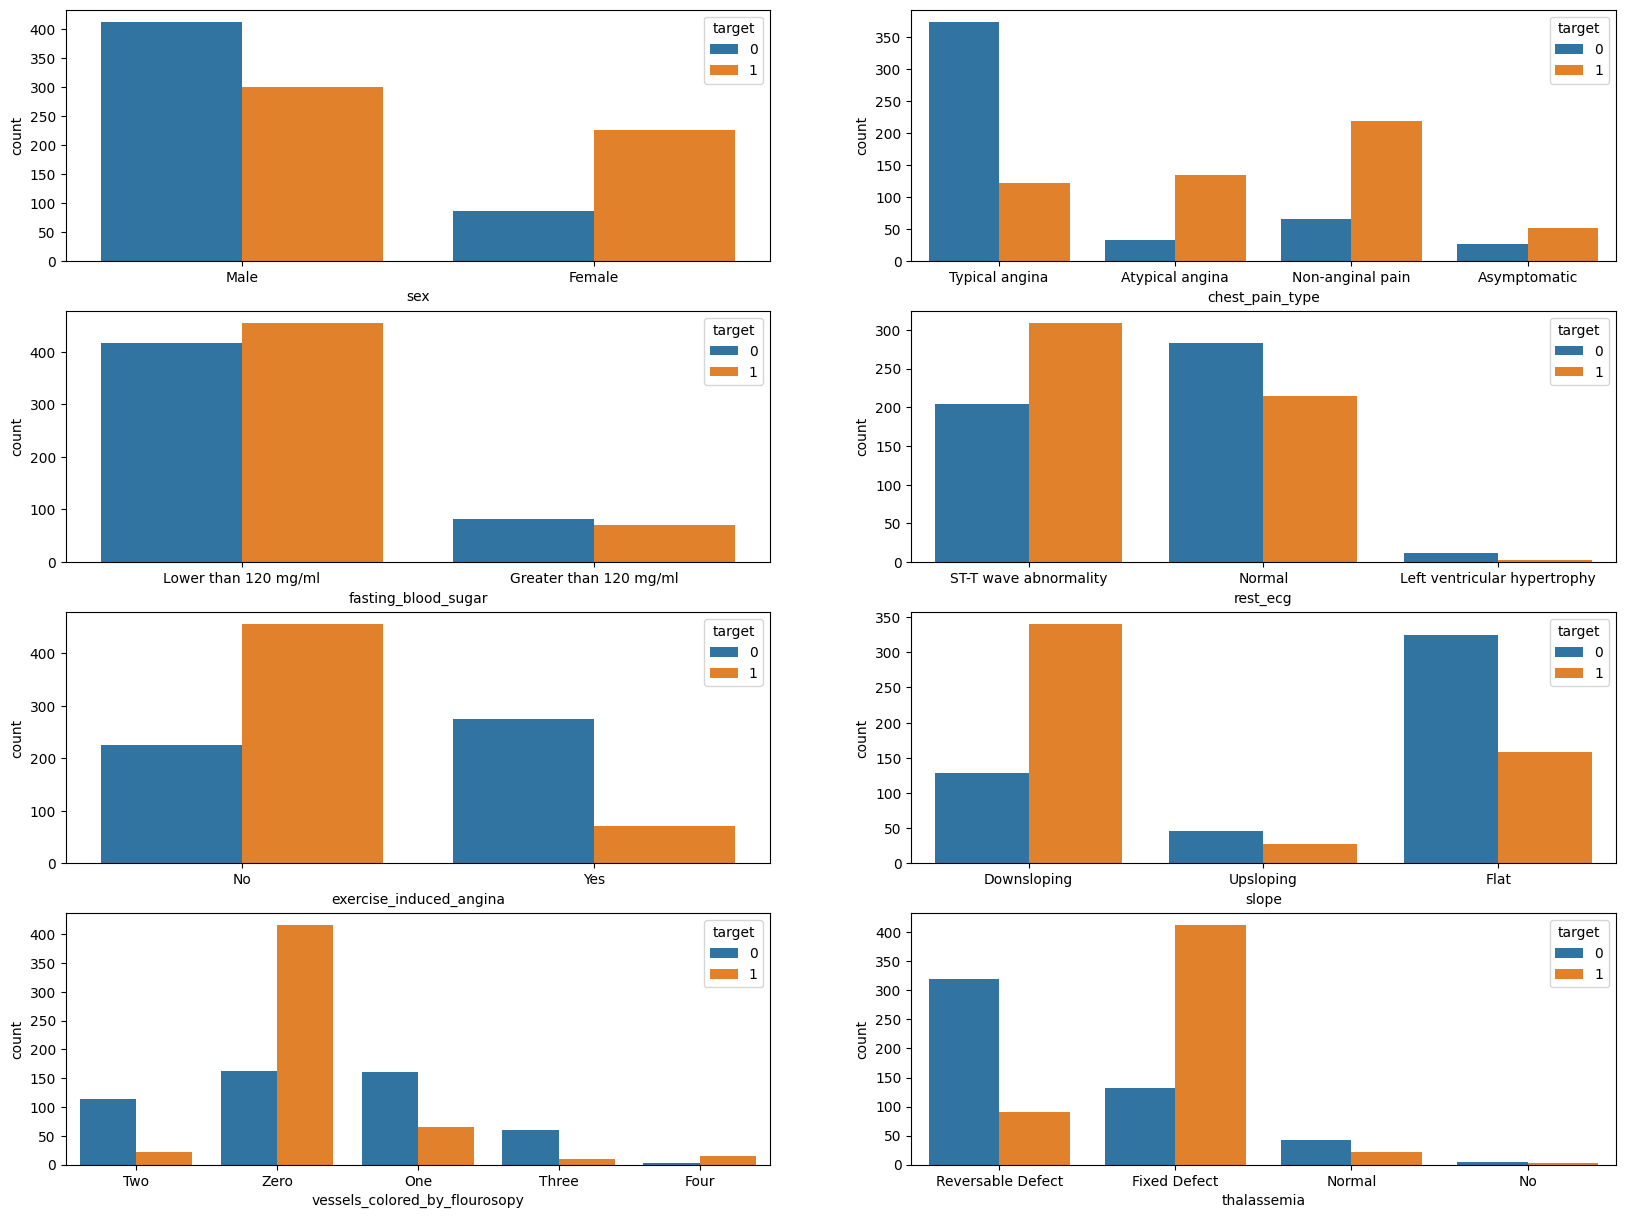

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(20,15))
ax=ax.ravel()

for index, col in enumerate(cat):
    sns.countplot(x=col,hue='target',data=df,ax=ax[index])

## Insights from categorical values

- Female seems more at risk of heart disease

- Slight increased risk of heart disease when fasting blood sugar is lower than 120mg/ml

- Increased risk of heart disease when exercise induced angina is not present

- Highest risk of heart disease when vessels colored by flourosopy is zero

- Typical angina has the lowest risk of heart disease

- ST-T wave abnormality presents the highest heart disease risk

- Downsloping and flat represents the highest and lowest risk of heart disease respectively

- Fixed defect and reverseable defect of thalassemia presents the highest and lowest risk of heart disease respectively

## Advanced EDA

- See if we can extract more insights from some of the numerical variables when we categorize them as low, medium and high

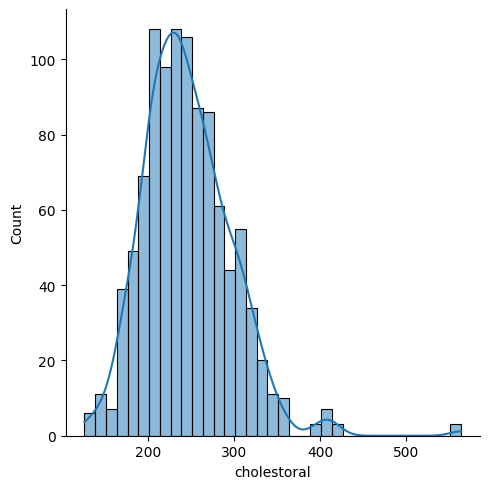

In [ ]:
sns.displot(data=df,x='cholestoral',kde=True)
plt.show()

## Cholesterol Reseach

### According to https://www.medicalnewstoday.com/articles/315900:


*Cholesterol levels for adults*

- *Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.*

Assuming the column is indeed referring to total cholesterol levels.  Let's try to explore this in relation to heart disease

In [ ]:
def chol_level(x):
    if x > 240:
        return 2 #high
    elif x > 200:
        return 1 #medium (borderline high)
    else:
        return 0 #desirable

In [ ]:
df['cholestoral_level'] = df['cholestoral'].apply(chol_level)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target,cholestoral_level
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0,1
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,1
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0,1
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0,2
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0,2
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1,2


In [ ]:
df[['cholestoral_level','cholestoral']]

#looks like we have what we want

,cholestoral_level,cholestoral
0,1,212
1,1,203
2,0,174
3,1,203
4,2,294
...,...,...
1020,1,221
1021,2,258
1022,2,275
1023,2,254


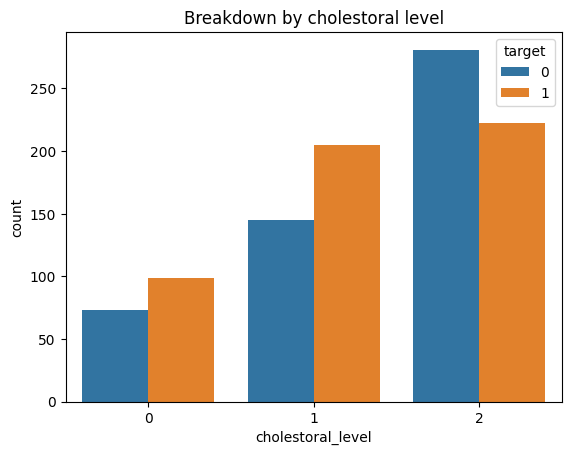

In [ ]:
sns.countplot(x='cholestoral_level',hue='target',data=df)
plt.title('Breakdown by cholestoral level')
plt.show()

Seems that higher cholestoral does make you less likely to have heart disease

## Blood pressure research

### According to https://www.cdc.gov/bloodpressure/about.htm:

- Normal 	systolic: less than 120 mm Hg

- At Risk (prehypertension) 	systolic: 120–139 mm Hg

- High Blood Pressure (hypertension) 	systolic: 140 mm Hg or higher

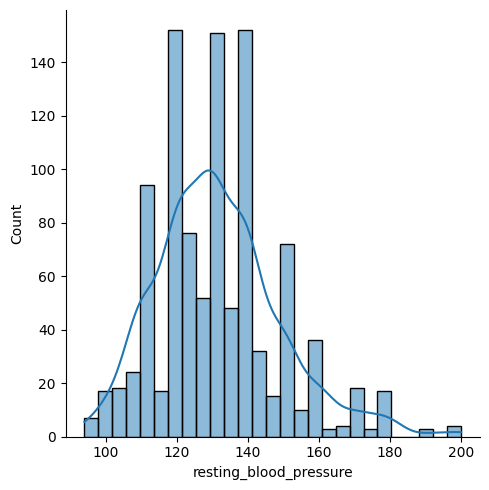

In [ ]:
sns.displot(data=df,x='resting_blood_pressure',kde=True)
plt.show()

In [ ]:
df['resting_blood_pressure'].describe()

,resting_blood_pressure
count,1025.000000
mean,131.611707
std,17.516718
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
def get_blood_level(x):
    if x > 140:
        return 2 #high
    elif x > 120:
        return 1 #at risk
    else:
        return 0 #normal

In [ ]:
df['blood_pressure_level'] = df['resting_blood_pressure'].apply(get_blood_level)
df[['blood_pressure_level','resting_blood_pressure']]

,blood_pressure_level,resting_blood_pressure
0,1,125
1,1,140
2,2,145
3,2,148
4,1,138
...,...,...
1020,1,140
1021,1,125
1022,0,110
1023,0,110


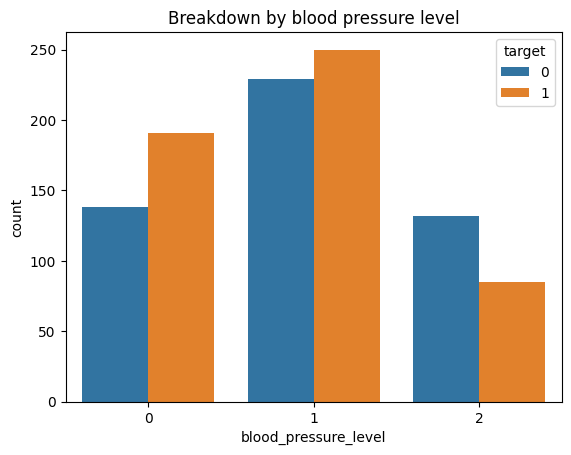

In [ ]:
sns.countplot(x='blood_pressure_level',hue='target',data=df)
plt.title('Breakdown by blood pressure level')
plt.show()

Interestingly, it seems that for those with low blood pressure, there're more occurence of heart disease proportionally than high blood pressure levels

# Classification Problem

There are some some classification models we can consider using:

- Ensemble of trees (RandomForestClassifier).  From our EDA, there does not seem to be a strong trend among each of the variables.  D.Tree may help us discover some of the rules.

- Linear SVC

- kNearestNeighbor

## Workflow

For each of the model, we will split the data into 70/15/15  for train, test, validation.  (as per stated in task).  We will use predict_proba and use a custom function to determine which probability threshold to classify.  My major scoring would be accuracy while keeping in mind of recall (since we want to capture all those at risk of heart disease)

In [ ]:
#import required library

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import LabelEncoder #for kNN
from sklearn.preprocessing import StandardScaler #for kNN
from sklearn.preprocessing import MinMaxScaler #for SVC

## kNN

In [ ]:
cat

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [ ]:
num

['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

In [ ]:
le = LabelEncoder()
scaler = StandardScaler()

In [ ]:
df_knn = df.copy()

In [ ]:
scaler.fit(df_knn[num].values)
df_knn[num] = scaler.transform(df_knn[num].values)

#scaled numerical values

In [ ]:
for col in cat:
    le.fit(df_knn[col].values)
    df_knn[col] = le.transform(df_knn[col].values)

In [ ]:
X_features = ['age',
              'sex',
              'chest_pain_type',
              'resting_blood_pressure',
              'cholestoral',
              'fasting_blood_sugar',
              'rest_ecg',
              'Max_heart_rate',
              'exercise_induced_angina',
              'oldpeak',
              'slope',
              'vessels_colored_by_flourosopy',
              'thalassemia']

y_outcome = 'target'

X = df_knn[X_features]
y = df_knn[y_outcome]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(717, 13)
(154, 13)
(154, 13)


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Default parameter accuracy score {accuracy_score(y_test, y_pred)}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,y_pred)}')

Default parameter accuracy score 0.7532467532467533

Confusion Matrix:
[[72 20]
 [18 44]]


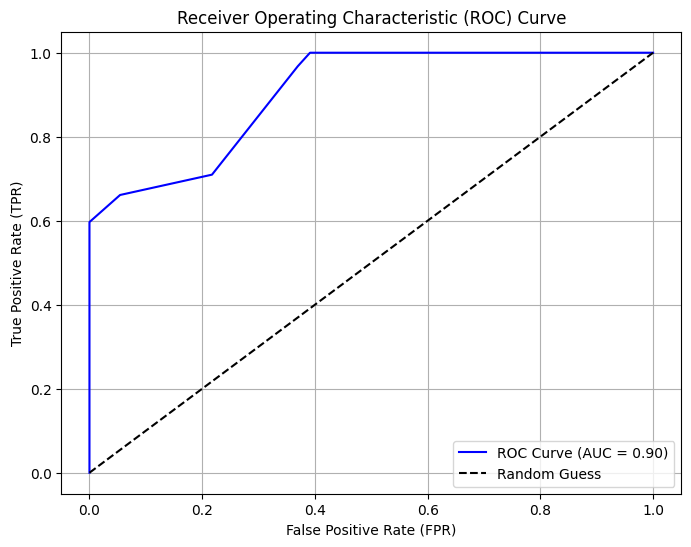

In [ ]:


# Compute predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
#hyperparameter tuning
knn = KNeighborsClassifier()

param = {'n_neighbors':[1,2,3,6,9,12,15],
        }

cv = GridSearchCV(estimator=knn, param_grid=param, scoring='accuracy',
                  verbose=5,cv=5,n_jobs=-1)

cv.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 6, 9, 12, 15]},
             scoring='accuracy', verbose=5)

In [ ]:
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 1}
0.9679001554001554


In [ ]:
y_pred = cv.predict(X_validate)
print(f'Tuned parameter accuracy score {accuracy_score(y_validate, y_pred)}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_validate,y_pred)}')

Tuned parameter accuracy score 0.9675324675324676

Confusion Matrix:
[[67  0]
 [ 5 82]]


With n_neighbor = 1, the model yields the best results of 96.7% accuracy.  Looking at the confusion matrix, there are no false negative but false positives.  Let's see what some more advanced models presents us

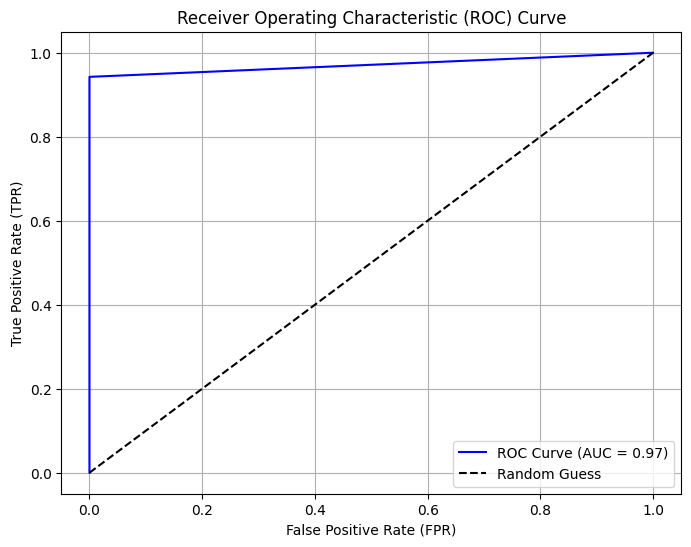

In [ ]:
# Use the best estimator from GridSearchCV
best_knn = cv.best_estimator_

# Compute predicted probabilities for the positive class
y_pred_proba = best_knn.predict_proba(X_validate)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_validate, y_pred_proba)

# Compute the AUC
auc_score = roc_auc_score(y_validate, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Ensemble trees

Tree models work well without scaling so we can just simply split our data and fit our model but it may still more appropriate to encode the categorical variables

In [ ]:
cat

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [ ]:
df_rf = df.copy()
df_rf

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target,cholestoral_level,blood_pressure_level
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0,1,1
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,1,1
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0,0,2
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0,1,2
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1,1,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0,2,1
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0,2,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1,2,0


In [ ]:
for col in cat:
    le.fit(df_rf[col].values)
    df_rf[col] = le.transform(df_rf[col].values)

In [ ]:
df_rf

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target,cholestoral_level,blood_pressure_level
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0,1,1
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0,1,1
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0,0,2
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0,1,2
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,4,0,1,1,1
1021,60,1,3,125,258,1,1,141,1,2.8,1,1,3,0,2,1
1022,47,1,3,110,275,1,1,118,1,1.0,1,1,0,0,2,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,4,0,1,2,0


In [ ]:
X_features = ['age',
              'sex',
              'chest_pain_type',
              'resting_blood_pressure',
              'cholestoral',
              'fasting_blood_sugar',
              'rest_ecg',
              'Max_heart_rate',
              'exercise_induced_angina',
              'oldpeak',
              'slope',
              'vessels_colored_by_flourosopy',
              'thalassemia']

y_outcome = 'target'

X = df_rf[X_features]
y = df_rf[y_outcome]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=50,
                            max_features=round(np.sqrt(len(X_features))))

In [ ]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f'Default parameter accuracy score {accuracy_score(y_test, y_pred)}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,y_pred)}')

Default parameter accuracy score 0.974025974025974

Confusion Matrix:
[[92  0]
 [ 4 58]]


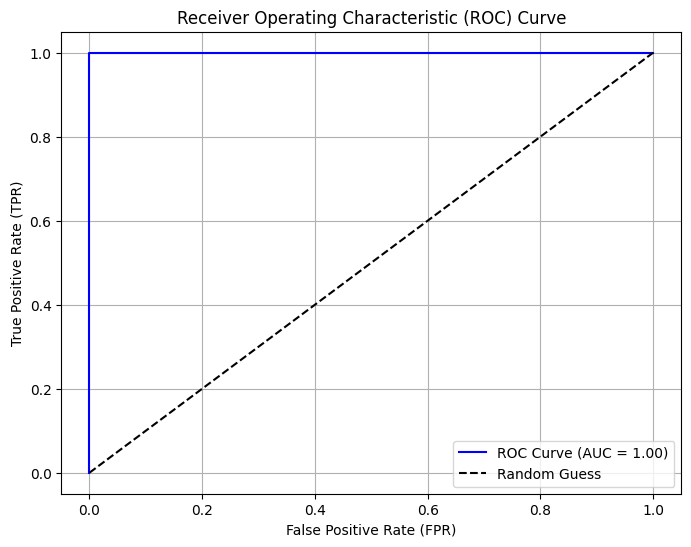

In [ ]:
# Compute predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Even without tuning much, our RandomForestRegressor beats the kNN model

In [ ]:
#hyperparameter tuning
knn = RandomForestClassifier()

param = {'n_estimators':[50,75,100,125],
         'max_features':[3,4,5,6,8,10],
         'max_depth':[5,10,15,20,25,30]
        }

cv = GridSearchCV(estimator=knn, param_grid=param, scoring='accuracy',
                  verbose=5,cv=5,n_jobs=-1)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': [3, 4, 5, 6, 8, 10],
                         'n_estimators': [50, 75, 100, 125]},
             scoring='accuracy', verbose=5)

In [ ]:
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 10, 'max_features': 8, 'n_estimators': 75}
0.9734848484848484


In [ ]:
y_pred = cv.predict(X_validate)
print(f'Tuned parameter accuracy score {accuracy_score(y_validate, y_pred)}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_validate,y_pred)}')

Tuned parameter accuracy score 0.9935064935064936

Confusion Matrix:
[[67  0]
 [ 1 86]]


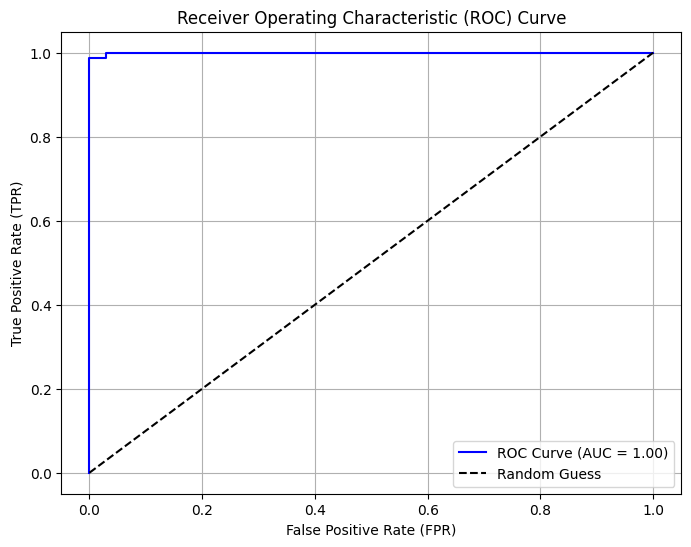

In [ ]:
# Use the best estimator from GridSearchCV
best_knn = cv.best_estimator_

# Compute predicted probabilities for the positive class
y_pred_proba = best_knn.predict_proba(X_validate)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_validate, y_pred_proba)

# Compute the AUC
auc_score = roc_auc_score(y_validate, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
y_pred = cv.predict_proba(X_validate)
y_pred_1_proba = y_pred[:,1]
y_pred_1_proba

array([0.05333333, 0.04      , 0.        , 0.94666667, 1.        ,
       0.89708642, 0.96      , 0.90666667, 0.        , 0.04      ,
       0.972     , 0.05333333, 0.01333333, 0.09333333, 1.        ,
       0.93333333, 0.94666667, 0.        , 0.90666667, 0.86666667,
       0.97307692, 0.        , 0.58666667, 0.84      , 0.01333333,
       0.        , 0.02666667, 0.86666667, 0.        , 0.04      ,
       0.01098039, 1.        , 0.06666667, 0.97333333, 1.        ,
       0.05333333, 0.01333333, 1.        , 0.        , 0.        ,
       0.87764706, 0.27833333, 1.        , 0.98666667, 1.        ,
       0.07333333, 0.92666667, 0.01333333, 1.        , 0.09333333,
       0.97234568, 0.04      , 0.93333333, 0.94317216, 0.01333333,
       0.04      , 0.12      , 1.        , 0.85234568, 0.88      ,
       0.9908547 , 0.07111111, 0.94566952, 0.97333333, 0.60888889,
       0.01333333, 1.        , 0.11792593, 1.        , 0.98      ,
       0.54666667, 0.01333333, 0.99974359, 0.02666667, 0.16333

AUC-ROC Score: 1.00


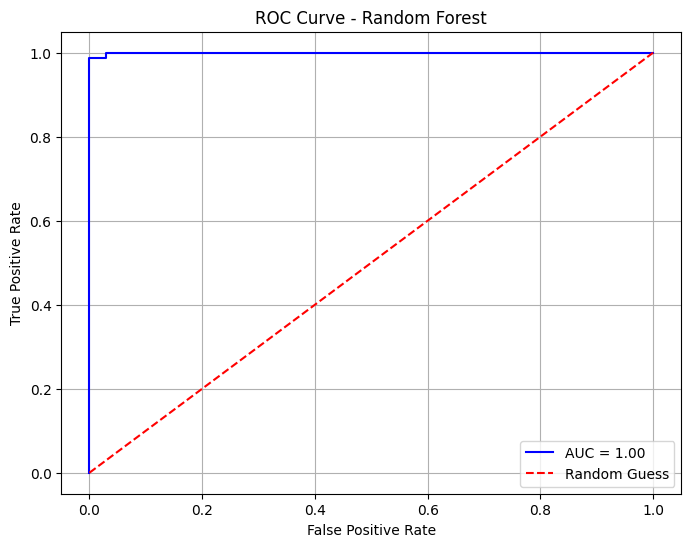

In [ ]:
# Compute AUC-ROC score
roc_auc = roc_auc_score(y_validate, y_pred_1_proba)
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_validate, y_pred_1_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Probability Threshold adjustment

The above is our baseline results with the best parameteres, maybe we can use predict_proba and some function to output a class prediction according to some threshold to futher improve the scoring

In [ ]:
#function to get class based on probability
def get_y_pred(p, proba_pred):
    y_pred = []
    for i in range(0,len(proba_pred)):
        if proba_pred[i] > p:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return pd.Series(y_pred)

In [ ]:
prob = [0.1,0.3,0.4,0.6,0.75,0.8,0.875]

for p in prob:
    y_pred = get_y_pred(p,y_pred_1_proba)
    print(f'At P = {p}, Accuracy score = {accuracy_score(y_validate,y_pred)}')
    print(confusion_matrix(y_validate,y_pred))
    print('\n')

At P = 0.1, Accuracy score = 0.9285714285714286
[[56 11]
 [ 0 87]]


At P = 0.3, Accuracy score = 0.9805194805194806
[[65  2]
 [ 1 86]]


At P = 0.4, Accuracy score = 0.9935064935064936
[[67  0]
 [ 1 86]]


At P = 0.6, Accuracy score = 0.9675324675324676
[[67  0]
 [ 5 82]]


At P = 0.75, Accuracy score = 0.961038961038961
[[67  0]
 [ 6 81]]


At P = 0.8, Accuracy score = 0.961038961038961
[[67  0]
 [ 6 81]]


At P = 0.875, Accuracy score = 0.9025974025974026
[[67  0]
 [15 72]]




## 99% accuracy
At 0.4 probability, we get 99% accuracy

## Feature Importance

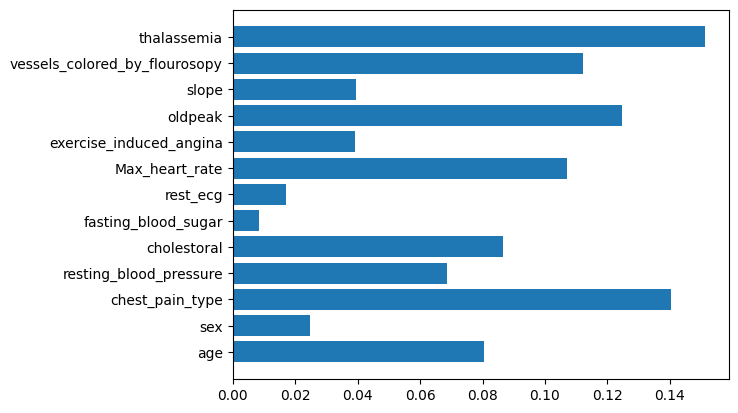

In [ ]:
rf = RandomForestClassifier(max_depth= 15,
                            max_features= 3,
                            n_estimators= 125) #best parameters

rf.fit(X_train,y_train)
plt.barh(X_features,rf.feature_importances_)
plt.show()

Which seems to confirm what we suspected during the EDA, most high importance feature are of categorical nature, with the exception of oldpeak and max heart rate

## LinearSVC

In [ ]:
svc = LinearSVC()

In [ ]:
df_svc = df.copy()

We used LabelEncoder before, now let's try dummies since SVC is more sensitive to the scale of the feature values

In [ ]:
dum_df = pd.get_dummies(df_svc,columns=cat)
dum_df

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,cholestoral_level,blood_pressure_level,sex_Female,sex_Male,...,slope_Upsloping,vessels_colored_by_flourosopy_Four,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,1,1,False,True,...,False,False,False,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,1,1,False,True,...,True,False,False,False,False,True,False,False,False,True
2,70,145,174,125,2.6,0,0,2,False,True,...,True,False,False,False,False,True,False,False,False,True
3,61,148,203,161,0.0,0,1,2,False,True,...,False,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,2,1,True,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,1,1,False,True,...,False,False,False,False,False,True,True,False,False,False
1021,60,125,258,141,2.8,0,2,1,False,True,...,False,False,True,False,False,False,False,False,False,True
1022,47,110,275,118,1.0,0,2,0,False,True,...,False,False,True,False,False,False,True,False,False,False
1023,50,110,254,159,0.0,1,2,0,True,False,...,False,False,False,False,False,True,True,False,False,False


In [ ]:
X_features = list(dum_df.columns)[8:] #saving dummies into new X_features

In [ ]:
for col in num:
    X_features.append(col)

X_features #for svc

['sex_Female',
 'sex_Male',
 'chest_pain_type_Asymptomatic',
 'chest_pain_type_Atypical angina',
 'chest_pain_type_Non-anginal pain',
 'chest_pain_type_Typical angina',
 'fasting_blood_sugar_Greater than 120 mg/ml',
 'fasting_blood_sugar_Lower than 120 mg/ml',
 'rest_ecg_Left ventricular hypertrophy',
 'rest_ecg_Normal',
 'rest_ecg_ST-T wave abnormality',
 'exercise_induced_angina_No',
 'exercise_induced_angina_Yes',
 'slope_Downsloping',
 'slope_Flat',
 'slope_Upsloping',
 'vessels_colored_by_flourosopy_Four',
 'vessels_colored_by_flourosopy_One',
 'vessels_colored_by_flourosopy_Three',
 'vessels_colored_by_flourosopy_Two',
 'vessels_colored_by_flourosopy_Zero',
 'thalassemia_Fixed Defect',
 'thalassemia_No',
 'thalassemia_Normal',
 'thalassemia_Reversable Defect',
 'age',
 'resting_blood_pressure',
 'cholestoral',
 'Max_heart_rate',
 'oldpeak']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(dum_df[num].values)
dum_df[num] = scaler.transform(dum_df[num].values)

In [ ]:
dum_df[X_features]

,sex_Female,sex_Male,chest_pain_type_Asymptomatic,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Greater than 120 mg/ml,fasting_blood_sugar_Lower than 120 mg/ml,rest_ecg_Left ventricular hypertrophy,rest_ecg_Normal,...,vessels_colored_by_flourosopy_Zero,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
0,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,True,0.479167,0.292453,0.196347,0.740458,0.161290
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,True,0.500000,0.433962,0.175799,0.641221,0.500000
2,False,True,False,False,False,True,False,True,False,False,...,True,False,False,False,True,0.854167,0.481132,0.109589,0.412214,0.419355
3,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,True,0.666667,0.509434,0.175799,0.687023,0.000000
4,True,False,False,False,False,True,True,False,False,False,...,False,True,False,False,False,0.687500,0.415094,0.383562,0.267176,0.306452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,True,False,True,False,False,False,True,False,False,...,True,True,False,False,False,0.625000,0.433962,0.216895,0.709924,0.000000
1021,False,True,False,False,False,True,False,True,False,True,...,False,False,False,False,True,0.645833,0.292453,0.301370,0.534351,0.451613
1022,False,True,False,False,False,True,False,True,False,True,...,False,True,False,False,False,0.375000,0.150943,0.340183,0.358779,0.161290
1023,True,False,False,False,False,True,False,True,False,True,...,True,True,False,False,False,0.437500,0.150943,0.292237,0.671756,0.000000


In [ ]:
X = dum_df[X_features]
y = dum_df[y_outcome]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [ ]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(f'Default parameter accuracy score {accuracy_score(y_test, y_pred)}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,y_pred)}')

Default parameter accuracy score 0.8116883116883117

Confusion Matrix:
[[70 22]
 [ 7 55]]


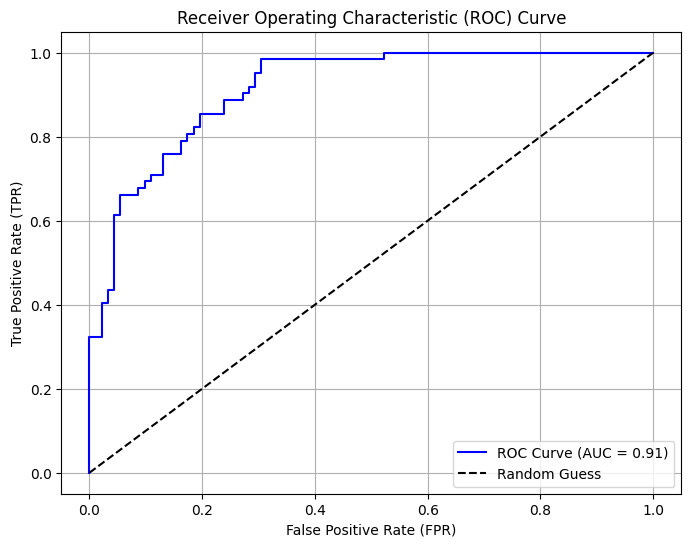

In [ ]:
# Compute decision function values for the test set
y_scores = svc.decision_function(X_test)

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the AUC
auc_score = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#hyperparameter tuning

svc = LinearSVC()

param = {
    'C':[0.1,1,10,100,1000],
    'max_iter':[1000,2000]
}

cv = GridSearchCV(estimator=svc, param_grid=param, scoring='accuracy',
                  verbose=5,cv=5,n_jobs=-1)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [1000, 2000]},
             scoring='accuracy', verbose=5)

In [ ]:
print(cv.best_params_)
print(cv.best_score_)

{'C': 1, 'max_iter': 1000}
0.8716880341880342


In [ ]:
y_pred = cv.predict(X_validate)
print(f'Tuned parameter accuracy score {accuracy_score(y_validate, y_pred)}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_validate,y_pred)}')

Tuned parameter accuracy score 0.8246753246753247

Confusion Matrix:
[[53 14]
 [13 74]]


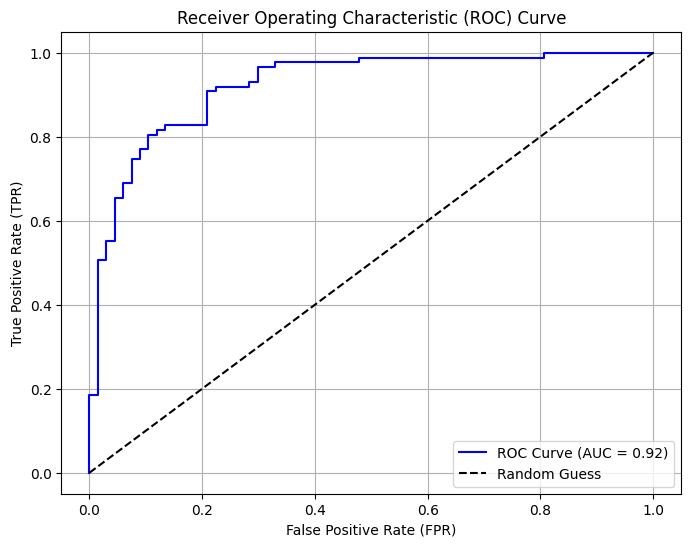

In [ ]:
# Use the best estimator from GridSearchCV
best_svc = cv.best_estimator_

# Compute decision scores for the validation set
y_scores = best_svc.decision_function(X_validate)

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_validate, y_scores)

# Compute the AUC
auc_score = roc_auc_score(y_validate, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Based on the warning and the results, it seems that SVC does not work very well with our problem

## Conclusion

- We have done some basic and advanced EDA to enhance our understanding of the problem

- We have tried various models, with the most success with the RandomForestClassifier, reaching 99% accuracy on validation

In [ ]:
def predict_user_input(input_features, rf_model, train_columns, scaler, num_features, cat_features, threshold=0.4):
    """
    Predict heart disease likelihood based on user input.

    Parameters:
    - input_features (dict): Raw user inputs as a dictionary of feature values.
    - rf_model (RandomForestClassifier): Pre-trained Random Forest model.
    - train_columns (list): List of feature names used in training (from one-hot encoding).
    - scaler (StandardScaler): Pre-fitted scaler for numerical features.
    - num_features (list): List of numerical feature names.
    - cat_features (list): List of categorical feature names.
    - threshold (float): Probability threshold for classification (default=0.4).

    Returns:
    - dict: Predicted probability and classification result.
    """
    # Convert input features to DataFrame
    input_df = pd.DataFrame([input_features])

    # One-hot encode categorical features
    input_encoded = pd.get_dummies(input_df, columns=cat_features)

    # Align input features with the training dataset's columns
    missing_cols = set(train_columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0  # Add missing columns with default value 0

    # Reorder the columns to match the training data
    input_encoded = input_encoded[train_columns]

    # Scale numerical features
    input_encoded[num_features] = scaler.transform(input_encoded[num_features])

    # Predict probabilities
    prob = rf_model.predict_proba(input_encoded)[0][1]  # Probability for target=1

    # Classification based on threshold
    classification = 1 if prob > threshold else 0

    return {
        "Predicted Probability": prob,
        "Classification (0=No Disease, 1=Disease)": classification
    }


In [ ]:
# One-hot encode the training data
df_encoded = pd.get_dummies(df, columns=cat)

# Define features and target
X_features = [col for col in df_encoded.columns if col != "target"]
y_outcome = "target"

X = df_encoded[X_features]
y = df_encoded[y_outcome]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save training columns
train_columns = X_train.columns

# Fit StandardScaler for numerical features
scaler = StandardScaler()
scaler.fit(X_train[num])


StandardScaler()

In [ ]:
# Train Random Forest with best parameters
best_rf_model = RandomForestClassifier(max_depth=15, max_features=3, n_estimators=125, random_state=42)
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, max_features=3, n_estimators=125,
                       random_state=42)

In [ ]:
# Example user input
user_input = {
    'age': 60,
    'sex': 'Male',
    'chest_pain_type': 'Asymptomatic',
    'resting_blood_pressure': 140,
    'cholestoral': 360,
    'fasting_blood_sugar': 'Lower than 120 mg/ml',
    'rest_ecg': 'Normal',
    'Max_heart_rate': 150,
    'exercise_induced_angina': 'No',
    'oldpeak': 1.5,
    'slope': 'Flat',
    'vessels_colored_by_flourosopy': 'Normal',
    'thalassemia': 'Normal'
}

# Predict
try:
    result = predict_user_input(
        input_features=user_input,
        rf_model=best_rf_model,
        train_columns=train_columns,
        scaler=scaler,
        num_features=num,
        cat_features=cat,
        threshold=0.4,
    )
    print(f"Predicted Probability: {result['Predicted Probability']:.2%}")
    print(f"Classification: {result['Classification (0=No Disease, 1=Disease)']}")
except ValueError as e:
    print(e)


Predicted Probability: 52.80%
Classification: 1


In [ ]:
import pickle

# Save the Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

# Save the StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the feature column names
with open("columns.pkl", "wb") as f:
    pickle.dump(train_columns, f)

# Save numerical and categorical features
with open("num_features.pkl", "wb") as f:
    pickle.dump(num, f)

with open("cat_features.pkl", "wb") as f:
    pickle.dump(cat, f)


In [ ]:
from google.colab import files

# Download all files
files.download('rf_model.pkl')
files.download('scaler.pkl')
files.download('columns.pkl')
files.download('num_features.pkl')
files.download('cat_features.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>